# Add Annotation Data

In [1]:
import os
import pandas as pd

## 0. Prepare Necessary Data

In [2]:
from teilab.datasets import TeiLabDataSets
dataset = TeiLabDataSets(verbose=False)

In [3]:
dir1    = dataset.get_data(password="<PASSWORD1>")
dir2    = dataset.get_data(password="<PASSWORD2>")
dir2sup = dataset.get_data(password="<PASSWORD2-sup>")

In [4]:
print(f"""[Downloaded Data]
Directory1     : {dir1}
Directory2     : {dir2}
Directory2(sup): {dir2sup}
""")

[Downloaded Data]
Directory1     : /Users/iwasakishuto/Github/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/teilab/data/<PASSWORD1>
Directory2     : /Users/iwasakishuto/Github/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/teilab/data/<PASSWORD2>
Directory2(sup): /Users/iwasakishuto/Github/TeiLab-BasicLaboratoryWork-in-LifeScienceExperiments/teilab/data/<PASSWORD2-sup>



## 1. Read Data

In [5]:
dataset.samples.show_groups()

  idx  Condition              gn  GroupName                              FileName
-----  -------------------  ----  -------------------------------------  ---------------------------------------------------
    0  mock                    0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_1.txt
    1  siVIM-270               0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_2.txt
    2  siVIM-270(2'OMe2-5)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_3.txt
    3  siVIM-270(2'OMe6-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_1_4.txt
    4  siVIM-270(2'OMe2-8)     0  SG19378659_257236339458_S001_GE1_1200  SG19378659_257236339458_S001_GE1_1200_Jun14_2_1.txt
    5  mock(1)                 1  US91503671_253949442637_S01_GE1_105    US91503671_253949442637_S01_GE1_105_Dec08_2_1.txt
    6  siVIM-270(LNA3-5)       1  US91503671_

### 1.1 `sample_list.txt`

Read sample list (`sample_list.txt`) and get each of the listed data (In this case, `GroupName`: `SG19378659_257236339458_S001_GE1_1200`).

In [6]:
df_sample_list = pd.read_csv(os.path.join(dir2, "sample_list.txt"), sep="\t")
df_sample_list.head()

SampleNumber                                           FileName Condition
0             1  SG19378659_257236339458_S001_GE1_1200_Jun14_1_...      mock
1             2  SG19378659_257236339458_S001_GE1_1200_Jun14_1_...       RNA
2             3  SG19378659_257236339458_S001_GE1_1200_Jun14_1_...  2OMe_2_5
3             4  SG19378659_257236339458_S001_GE1_1200_Jun14_1_...  2OMe_6_8
4             5  SG19378659_257236339458_S001_GE1_1200_Jun14_2_...  2OMe_2_8

### 1.2 MicroArray Data

Read expression data such as `gProcessedSignal` and probe annotation data.

In [7]:
df_combined = pd.read_csv(os.path.join(dir2, df_sample_list.FileName[0]), sep="\t", header=9, usecols=[
    "FeatureNum", "ControlType", "ProbeName", "SystematicName"
])
for no,fn,cond in df_sample_list.values:
    df = pd.read_csv(os.path.join(dir2, fn), sep="\t", header=9, usecols=["gProcessedSignal"])
    df.columns = [cond]
    df_combined = pd.concat([df_combined, df], axis=1)
df_combined.head(3)

FeatureNum  ControlType        ProbeName   SystematicName           mock  \
0           1            1  GE_BrightCorner  GE_BrightCorner  221432.400000   
1           2            1       DarkCorner       DarkCorner       3.354572   
2           3            1       DarkCorner       DarkCorner       3.388527   

             RNA       2OMe_2_5       2OMe_6_8       2OMe_2_8  
0  199347.900000  192879.600000  194686.200000  157843.700000  
1       2.708364       2.811849       2.723051       3.067518  
2       2.737764       2.843127       2.749358       3.099210

### 1.3 Correspondence data

Correspondence data of `ProbeID` (`ProbeName`) and `GeneSymbol` (`GeneName`)

In [8]:
df_correspondence = pd.read_csv(os.path.join(dir2sup, "072363_D_AA_20200924.txt"), sep="\t", usecols=["ProbeID", "GeneSymbol"])
df_correspondence.head(3)

ProbeID  GeneSymbol
0    A_23_P421175      FAM83H
1    A_23_P392076       STRN3
2  A_22_P00016358  SLC8A1-AS1

## 2. Merge and Add annotation data

Annotation data (column) is added by merging `df_combined` and `df_correspondence` via `ProbeName(ID)` column.

### 2.1 Merge

In [9]:
df_merged = pd.merge(left=df_combined, right=df_correspondence, left_on="ProbeName", right_on="ProbeID", how="left")
df_merged.head(3)

FeatureNum  ControlType        ProbeName   SystematicName           mock  \
0           1            1  GE_BrightCorner  GE_BrightCorner  221432.400000   
1           2            1       DarkCorner       DarkCorner       3.354572   
2           3            1       DarkCorner       DarkCorner       3.388527   

             RNA       2OMe_2_5       2OMe_6_8       2OMe_2_8 ProbeID  \
0  199347.900000  192879.600000  194686.200000  157843.700000     NaN   
1       2.708364       2.811849       2.723051       3.067518     NaN   
2       2.737764       2.843127       2.749358       3.099210     NaN   

  GeneSymbol  
0        NaN  
1        NaN  
2        NaN

In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62976 entries, 0 to 62975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FeatureNum      62976 non-null  int64  
 1   ControlType     62976 non-null  int64  
 2   ProbeName       62976 non-null  object 
 3   SystematicName  62976 non-null  object 
 4   mock            62976 non-null  float64
 5   RNA             62976 non-null  float64
 6   2OMe_2_5        62976 non-null  float64
 7   2OMe_6_8        62976 non-null  float64
 8   2OMe_2_8        62976 non-null  float64
 9   ProbeID         61657 non-null  object 
 10  GeneSymbol      45213 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 5.8+ MB


### 2.2 Handle missing values

In [11]:
df_merged["ProbeID"]    = df_merged["ProbeID"].fillna("Not Found")
df_merged["GeneSymbol"] = df_merged["GeneSymbol"].fillna("unknown")
df_merged.head(3)

FeatureNum  ControlType        ProbeName   SystematicName           mock  \
0           1            1  GE_BrightCorner  GE_BrightCorner  221432.400000   
1           2            1       DarkCorner       DarkCorner       3.354572   
2           3            1       DarkCorner       DarkCorner       3.388527   

             RNA       2OMe_2_5       2OMe_6_8       2OMe_2_8    ProbeID  \
0  199347.900000  192879.600000  194686.200000  157843.700000  Not Found   
1       2.708364       2.811849       2.723051       3.067518  Not Found   
2       2.737764       2.843127       2.749358       3.099210  Not Found   

  GeneSymbol  
0    unknown  
1    unknown  
2    unknown

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62976 entries, 0 to 62975
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FeatureNum      62976 non-null  int64  
 1   ControlType     62976 non-null  int64  
 2   ProbeName       62976 non-null  object 
 3   SystematicName  62976 non-null  object 
 4   mock            62976 non-null  float64
 5   RNA             62976 non-null  float64
 6   2OMe_2_5        62976 non-null  float64
 7   2OMe_6_8        62976 non-null  float64
 8   2OMe_2_8        62976 non-null  float64
 9   ProbeID         62976 non-null  object 
 10  GeneSymbol      62976 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 5.8+ MB


## 3. Analysis

In [13]:
from teilab.utils import subplots_create
from teilab.plot.matplotlib import MAplot as mplMAplot
from teilab.plot.plotly import MAplot as plyMAplot

In [14]:
df_combined = df_combined[df_combined.ControlType==0].reset_index(drop=True)

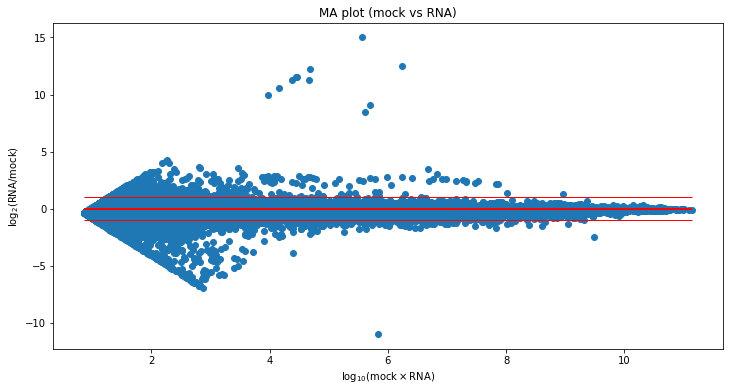

In [15]:
fig,ax = subplots_create(figsize=(12,6), style="matplotlib")
ax = mplMAplot(
    df=df_combined, x="mock", y="RNA", ax=ax, hlines={
        -1 : dict(colors='r', linewidths=1),
        0  : dict(colors='r', linewidths=2),
        1  : dict(colors='r', linewidths=1),
    }
)

In [16]:
fig = subplots_create(style="plotly")
fig = plyMAplot(
    df=df_combined, x="mock", y="RNA", fig=fig, hlines={
        -1 : dict(fillcolor="red", marker={"color":"red"}, line={"width":1}, showlegend=False),
        0  : dict(fillcolor="red", marker={"color":"red"}, line={"width":3}, showlegend=False),
        1  : dict(fillcolor="red", marker={"color":"red"}, line={"width":1}, showlegend=False),
    }, width=800, height=600
)
fig.show()